## HW 7 example solutions

### 1. Extended SEIR model with fatality rate $\mu$ and limited immunity [40%]

In the SEIR model you have worked in the class practice, the immunity was inifinity which means that once the patients get cured, they will never become susceptible again. This is not the case in the real world. Moreover, there's no fatality rate included. Adapt your SEIR model to incorporate thest two effects:

- the fatality rate of the disease is $\mu = 0.001$ (i.e., you get the SEIRD model)
- the immunity only last for one year (365 days)

Using the same values for $\lambda$ and $\gamma$ as you have used in the in-class in practice, assume the incubation is 7 days, plot the number of cases as a fuction of time, as well as the death as a function of time (you need to simulate the SEIRD model for more than 5 years). Explain your model results.

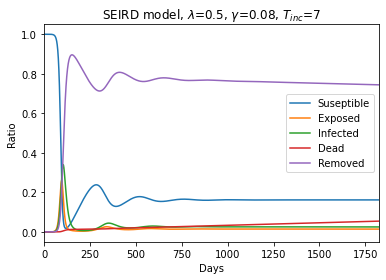

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1e7 # initial susceptible population, 1M
# simuation Time / Day
T = 365*5
# susceptiable ratio
s = np.zeros([T])
e = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])
# death rate - this is an extension to the SEIR model
d = np.zeros([T])

# contact rate
lamda = 0.5
# recover rate
gamma = 0.08
# incubation rate
incubation = 7
sigma = 1/incubation
# death rate
epsilon = 0.001

#immune only lasts for 365 days
beta = 1/365 # this is the rate that the removed population decrease - every day it lost 1/365

# initial infective people
i[0] = 10.0 / N # at day 0 there were 10 infections
s[0] = 1.0 # 100% of the population is susceptible

for t in range(T-1):
    s[t + 1] = s[t] - lamda * s[t] * i[t] + r[t]*beta # add the r*beta back to s
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t] 
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t] - epsilon* i[t]
    r[t + 1] = r[t] + gamma * i[t] - r[t]*beta # remove r*beta every iteration (day)
    d[t + 1] = d[t] + epsilon* i[t] # death

# plots
day = np.arange(T)
plt.plot(day,s,label='Suseptible')
plt.plot(day,e,label='Exposed')
plt.plot(day,i,label='Infected')
plt.plot(day,d,label='Dead')
plt.plot(day,r,label='Removed')
plt.xlabel('Days')
plt.xlim([0,T])
plt.ylabel('Ratio')
plt.title('SEIRD model, $\lambda$='+str(lamda)+', $\gamma$='+str(gamma)+', $T_{inc}$='+str(incubation))
plt.legend()

When immunity is not lifetime, the removed population starts to become susceptible - increase as a function of time until reaches a secondary peak - this is why you see multiple waves in the first a few years. After 3 years, the situation settles down.

### 2. A two-species model for population growth: Rabbits and Foxes

**The problem**: If we turn 2,000 rabbits and 10 foxes loose on a large, unpopulated island, how might the number of rabbits and foxes vary over time? 

**The Mathematical Model**: Let R(t) is the number of rabbits at time t - measured in months, similar to the S-I-R model discussed in the lecture notes, we would like to be able to make some predictions about the function R(t) and study what factors impact the number of the rabbits. 

The first term that influences the number of rabbits is the **reprductive rate, parameter $a$**, which can be interpreted as  “rabbits per month per rabbit”. So if only the reproduction is considered, we get the following mathematical equation for describing R(t):

$$ \dot{R}(t) = a\cdot R(t) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$ 
Here $\dot{R(t)}$ is the increase of rabbit per month. This is basically the exponential model for the population of rabbits. The solution to this equation is exponential and thus R(t) grows without bound (non-physical because the number of rabbits just go to infinity).

The second term is to consider the capacity of the land - one way out of the problem of unlimited growth is to modify equation (1) to take into account the fact that any given ecological system can support only some finite number of creatures over the long term. This number is called the **carrying capacity of the system**. We expect that, as a population approaches the carrying capacity of the system, the growth of the population should slow way down. That is: near carrying capacity, a population should hold nearly steady – its rate of change should be close to zero. 

Let’s denote this **carrying capacity by the parameter $b$**. What we would like to do, then, is to find an expression for $\dot{R}$ which is in some ways similar to equation (1), but the effective reproductive rate approaches 0 as $R(t)$ approaches $b$. One model which captures these features is the logistic equation, first proposed by the Belgian mathematician Otto Verhulst in 1845:

$$ \dot{R}(t) = a\cdot\left[1-\frac{R(t)}{b}\right]\cdot R(t) \;\;\;\;\;\;\;\;\;\;\;(2) $$

What this equation does is that when the number of rabbits $R(t)$ is very close to the carrying capacity $b$, comparing to equation (1), the reproductive rate is modified as $a\cdot\left[1-\frac{R(t)}{b}\right]\approx 0$, which is quite small - so that the number of rabbits does not grow out of bound. In the absense of foxes, the rabbit population growth follows equation (2) which is called a logistic model. 

Now let's consider the effect of foxes on reducing the number of rabbits. Say, the number of foxes is denoted as $F(t)$ at time $t$ (also measured in months),the population of rabbits declines at a rate $c$ proportional to the product $R(t)F(t)$. This is reasonable if we assume rabbits never die of old age – they just get a little too slow. Their death rate, which depends on the number of fatal encounters between rabbits and foxes, will then be approximately proportional to both $R$ and $F$ – and thus to their product. (This is the same kind of interaction effect we used in our SIR epidemic model to predict the rate at which susceptibles become infected.) Therefore using $c$ as the **"rabbits per month per rabbit-fox encounter"**, equation (2) is modified by an additional term on the RHS: 

$$ \dot{R(t)} = a\cdot\left[1-\frac{R(t)}{b}\right]\cdot R(t) - c\cdot R(t)\cdot F(t) \;\;\;\;\;\;\;\;\;\;\;(3) $$

This is the equation describing the number of rabbits as a function of time. 

To solve this equation, we need one more equation to describe the number of foxes since $F(t)$ appeared in equation (3). Let's assume that the fox population increases at a rate proportional to the number of encounters between rabbits and foxes $R(t)F(t)$. To a first approximation, this says that the birth rate in the fox population depends on maternal fox nutrition, and this depends on the number of rabbit-fox encounters, which is proportional to $R(t)F(t)$. The rate is denoted as parameter $d$ which is basically **"foxes reproduced per month per rabbit-fox encounter"**. On the other hand, we also need to consider the **natural death rate of the foxes** which is denoted as $e$, this term is propotional to the number of foxes and is calculated as $e\cdot F(t)$. Now putting things together, the governing equation for the number of foxes is written as:

$$ \dot{F(t)} = d\cdot R(t)\cdot F(t) - e\cdot F(t)\;\;\;\;\;\;\;\;\;\;\;(4) $$

Combine equations (3) and (4), we get a set of equations describing the changes in the number of rabbits ($R$) and foxes ($F$). These two are called the **Lotka-Volterra equations** for bounded growth of rabbits. The coefficients a, b, c, d, and e are parameters – constants that have to be determined through field observations in particular circumstances.

**A Numerical Solution**: Let's solve equations (3) and (4) and see what kind of predictions the Lotka-Volterra equations make. Let $a = 0.1$, $b = 10000$, $c = 0.005$, $d = 0.00004$ and $e=0.04$. Let's also suppose that there are 2000 rabbits ( $R[0] = 2000$ ) and 10 foxes ( $F[0]=10$ ) at time $t = 0$. 

* write a Python code to solve the Lotka-Volterra equations with the given initial conditions and parameters
* plot the two populations over the next 300 months (i.e., $0\le t \le 300$) in the same plot, what kind of behavior did you get for the two populations? (hint: since the # of foxes are mush smaller than rabbits, you may need to multiply F(t) by a factor of 100 in order to show them in the same plot - or your can use double-y axis)
* what are the maximum numbers of rabbits and foxes in your simulation? 
* if you run your population simulation for a very long time (e.g., up to t = 3000 months), what do the solutions look like? what are the "final" numbers of rabbits and foxes? (hint: just use $R[3000]$ and $F[3000]$ as approximations for the "final" numbers) 
* [Extra credit 20%] Perform multiple simulations with different initial numbers of rabbits and foxes, then plot the relationship between 1) the initial number of rabbits and the final number of rabbits and 2) the initial number of fox and the final number of rabbits. Is the final number of rabbits controlled by these initial values? Explain your findings.


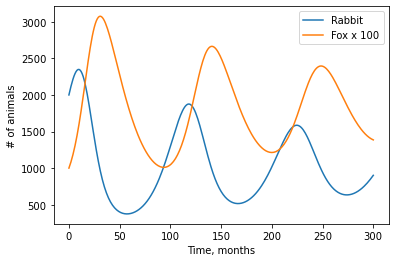

In [21]:
# define a function to solve the L-V equation
def LV_simulation(T, R0, F0, a, b, c, d, e):
    """
    This is a simple function solving for the Lotka-Volterra equations
    INPUT:
          T  - total simulation time in [months]
          R0 - initial number of rabbits
          F0 - initial number of foxes
          a  - reprductive rate or rabbits
          b  - carrying capacity
          c  - rabbits per month per rabbit-fox encounter
          d  - foxes reproduced per month per rabbit-fox encounter
          e  - natural death rate of the foxes
    OUTPUT:
          R - a time series of number of rabbts [list], length (T)
          F - a time series of number of foxes [list], length (T)
          
    """
  # simuation Time / Day
    R = np.zeros([T+1])
    F = np.zeros([T+1])

  # initial population
    R[0] = R0 # initial number of rabbits
    F[0] = F0 # initial number of foxes

    for i in range(T):
        R[i + 1] = R[i] + a * (1 - R[i]/b) * R[i] - c * R[i] * F[i]
        F[i + 1] = F[i] + d * R[i] *F[i] - e * F[i]

    return R, F

# now lets specify the parameters to solve for the L-V equations
a, b, c, d, e = 0.1, 10000, 0.005, 0.00004, 0.04
R0 = 2000 # initial R
F0 = 10   # initial F
T = 300   # total sim time in months

R,F = LV_simulation(T, R0, F0, a, b, c, d, e) # call the function

time = np.arange(T+1) # define a time series for plotting
plt.plot(time,R,label='Rabbit')
plt.plot(time,F*100,label='Fox x 100')
plt.xlabel('Time, months')
plt.ylabel('# of animals')
plt.legend()

we see periodic behavior in both curves, the maximum number of rabbits and foxes are:

In [28]:
print("the maximum number of rabbits is", int(max(R)))
print("the maximum number of foxes is", int(max(F)))

the maximum number of rabbits is 2348
the maximum number of foxes is 30


the "final" numbers of Rabit and fox are 999 and 18 , respectively


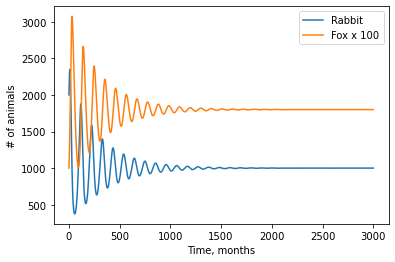

In [32]:
# now let's simulate for a very long time, T = 3000. just need to call the LV function again
T = 3000   # total sim time in months
R,F = LV_simulation(T, R0, F0, a, b, c, d, e) # call the function

time = np.arange(T+1) # define a time series for plotting
plt.plot(time,R,label='Rabbit')
plt.plot(time,F*100,label='Fox x 100')
plt.xlabel('Time, months')
plt.ylabel('# of animals')
plt.legend()
print('the "final" numbers of Rabit and fox are',int(R[-1]),'and',int(F[-1]),', respectively')

The asymptotic behavior of the LV equation can be derived from mathematics... (talk to me if you're interested)

(500.0, 2000.0)

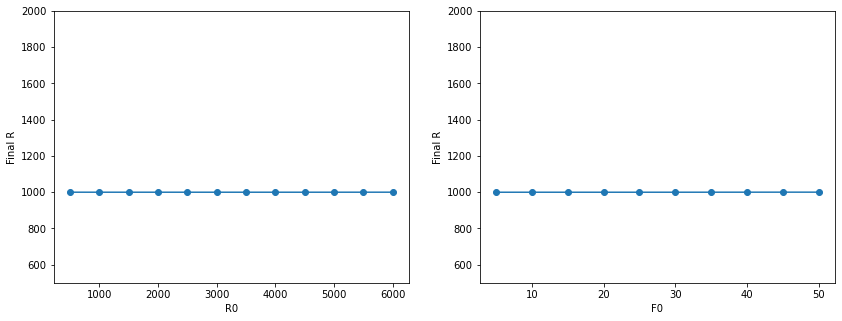

In [48]:
# now let's to multiple simulations to experiment with the number of initial rabbits
R0_list = np.arange(500,6500,500)

F0 = 10   # initial F
T = 3000   # total sim time in months
a, b, c, d, e = 0.1, 10000, 0.005, 0.00004, 0.04
R_fin = []
for R0 in R0_list:
    # now lets specify the parameters to solve for the L-V equations
    R,F = LV_simulation(T, R0, F0, a, b, c, d, e) # call the function
    R_fin.append(R[-1])

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(R0_list,R_fin,'-o')
plt.xlabel('R0')
plt.ylabel('Final R')
plt.ylim([500,2000])

F0_list = np.arange(5,55,5)

R0 = 20   # initial F
R_fin = []
for F0 in F0_list:
    # now lets specify the parameters to solve for the L-V equations
    R,F = LV_simulation(T, R0, F0, a, b, c, d, e) # call the function
    R_fin.append(R[-1])

plt.subplot(1,2,2)
plt.plot(F0_list,R_fin,'-o')
plt.xlabel('F0')
plt.ylabel('Final R')
plt.ylim([500,2000])

It looks like the final number of rabbits is not determined by either R0 or F0. Mathematically you can show that it is determined by the two parameters d and e, with $R[final]-> e/d$